## Overfitting

### Ideal Learning Law
S: side of training set
e: error on new data
r: representational space dimensionality
K: constant

Se^2 = rK
* if representational space is increased, then the error on new data will as well.
* e and r are correlated variables
* similar to ideal gas law

If loss on training is about the same on loss of testing data,
then we're doing well.

* usually don't have a choice of the size of training data, so you have to compensate with tweaking the other variables

Regularization - penalize for complexity

Maximum Margin Classifier: When a graph of dots are being classified, maximum margin says that you need to separate dots into classes with a straight line that is as far away as possible from the dots on either side.

Support Vector Machine

### Two Methods to Avoid Overfitting
- Cross-validation: (save some of your data to test on to make sure it's not overfitting and that your representational space is not too big)
- Regularization: modify loss function to penalize both error AND representational space size

This code is pulled and copies from lecture 3
Now we're going to tweak it :D

In [10]:
# Pull word list
# instead of going from word spelling to pronunciation
# we're going from pronunciation to spelling

from dask.dot import graphviz
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv -NO diabetes.csv

for details.

--2021-01-19 14:34:53--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.007s  

2021-01-19 14:34:54 (3.07 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [11]:
# Factors determining whether somebody has developed diabetes in the past 5 years

with open("diabetes.csv","r") as f:
    data = f.readlines()

feats = data.pop(0)
feats = feats.split(",")
# feats = feats[0:outcome_index] # old sucky code - gunked shit up
if 'Outcome\n' in feats:
    # feats.pop()
    feats.remove('Outcome\n')

In [12]:
alldata = []
alllabs = []

for i in data:
    # line = data[i]
    # line = line.replace('\n',' ') # don't need this either; it automatically clips the newline char
    csvline = i.split(",")
    alllabs = alllabs + [int(csvline.pop())] # instead of the bunkery below, we pop and return the label as and int
    # labs = labs + [int(csvline[len(csvline)-1])]
    csvline = list(map(float, csvline))
    # csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
    alldata.append(csvline)
    # dat = dat + [csvline]

In [13]:
print(len(alldata))

768


In [14]:
print(alldata[15])

[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0]


In [15]:
import random as ran

trainmask = [ran.randint(0,2) for i in range(len(alldata))]

traindata = [alldata[i] for i in range(len(alldata)) if trainmask[i]]
trainlabs = [alllabs[i] for i in range(len(alldata)) if trainmask[i]]

testdata = [alldata[i] for i in range(len(alldata)) if not trainmask[i]]
testlabs = [alllabs[i] for i in range(len(alldata)) if not trainmask[i]]

In [18]:
from sklearn import svm

trainerr = []
testerr = []
degrees = [0,1,2,3,4,5,6,7]

# BIG NOTE:
- the similarity function is known as the "kernel" (aaah, so that's what the fuck they're talking about)

also, RBF = Radial Basis Function (kind of a gaussian bump around the datapoints)
SVC = Support Vector Classification

In [19]:
for degree in degrees:
    clf = svm.SVC(gamma='scale',kernel='poly',degree=degree)
    clf.fit(traindata,trainlabs)

    pred = clf.predict(traindata)
    trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]

    pred = clf.predict(testdata)
    testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]


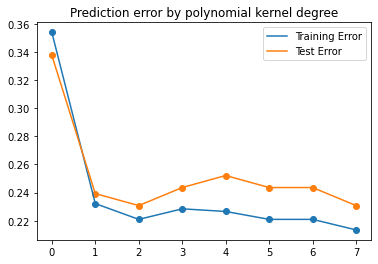

In [20]:
import matplotlib.pyplot as plt

plt.scatter(degrees, trainerr)
plt.plot(degrees, trainerr, label='Training Error')
plt.scatter(degrees, testerr)
plt.plot(degrees, testerr, label='Test Error')
plt.legend()
plt.title('Prediction error by polynomial kernel degree')
plt.show()